In [1]:
import numpy as np
import pandas as pd


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(['RowNumber',"CustomerId","Surname"],axis=1,inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Pre-processing

In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],prefix=['Geo',"Gender"],drop_first=False,dtype=int,)

In [14]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


### Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [18]:
x_train.shape

(8000, 13)

In [19]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,1,0,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,0,1,0
6669,517,56,9,142147.32,1,0,0,39488.04,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,1,0,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,1,0,0,1,0
5390,735,38,1,0.00,3,0,0,92220.12,1,0,0,1,0
860,667,43,8,190227.46,1,1,0,97508.04,1,0,0,0,1


In [20]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
x_train_scaled=scaler.fit_transform(x_train)

In [24]:
x_test_scaled=scaler.fit_transform(x_test)

In [25]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [26]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model=Sequential()

In [28]:
model.add(Dense(3,activation="sigmoid",input_dim=13))

In [29]:
model.add(Dense(1,activation="sigmoid"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["Accuracy"])

In [32]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 914us/step - loss: 0.6298 - Accuracy: 0.6696
Epoch 2/10
250/250 [==============================] - 0s 961us/step - loss: 0.5194 - Accuracy: 0.7947
Epoch 3/10
250/250 [==============================] - 0s 984us/step - loss: 0.4754 - Accuracy: 0.7945
Epoch 4/10
250/250 [==============================] - 0s 930us/step - loss: 0.4576 - Accuracy: 0.7945
Epoch 5/10
250/250 [==============================] - 0s 927us/step - loss: 0.4483 - Accuracy: 0.7945
Epoch 6/10
250/250 [==============================] - 0s 942us/step - loss: 0.4423 - Accuracy: 0.7947
Epoch 7/10
250/250 [==============================] - 0s 917us/step - loss: 0.4381 - Accuracy: 0.7951
Epoch 8/10
250/250 [==============================] - 0s 905us/step - loss: 0.4350 - Accuracy: 0.7995
Epoch 9/10
250/250 [==============================] - 0s 857us/step - loss: 0.4328 - Accuracy: 0.8036
Epoch 10/10
250/250 [==============================] - 0s 870us/step - loss: 0.431

In [33]:
model.layers[0].get_weights()

[array([[ 0.04179851, -0.2932216 ,  0.05067573],
        [-1.1243756 ,  0.84687865, -2.1104052 ],
        [-0.05731969, -0.08200061,  0.23908654],
        [-0.4308382 ,  0.39529344,  0.09115018],
        [ 0.2088783 , -0.11452378, -0.06054992],
        [-0.12239657,  0.02143935,  0.17217505],
        [ 0.6955403 , -0.55532026,  0.61764324],
        [-0.05584309, -0.21917893, -0.10350303],
        [ 0.4134817 , -0.5181034 , -0.11319474],
        [-0.12652522,  0.03409505, -0.76586604],
        [ 0.20001024, -0.41935852, -0.04004951],
        [-0.06072657,  0.02771818, -0.0504684 ],
        [ 0.5363603 , -0.5002212 ,  0.04187026]], dtype=float32),
 array([ 0.4831532, -0.3522359,  0.5832446], dtype=float32)]

In [34]:
model.layers[1].get_weights() #hidden layer

[array([[-1.4284953 ],
        [ 0.67519176],
        [-0.9963455 ]], dtype=float32),
 array([-0.42428052], dtype=float32)]

In [35]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 681us/step


In [36]:
y_pred=np.where(y_log>0.5,1,0)

In [37]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
accuracy_score(y_test,y_pred)

0.8115

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.57      0.16      0.25       393

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.57      2000
weighted avg       0.78      0.81      0.77      2000



## Improving Model Performance

In [40]:
model2=Sequential()

In [41]:
model2.add(Dense(10,activation="relu",input_dim=13))

In [42]:
model2.add(Dense(1,activation="sigmoid"))

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                140       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model2.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["Accuracy"])

In [45]:
history=model2.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.6212 - Accuracy: 0.6572 - val_loss: 0.5191 - val_Accuracy: 0.7831
Epoch 2/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4896 - Accuracy: 0.7905 - val_loss: 0.4596 - val_Accuracy: 0.8125
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4542 - Accuracy: 0.7994 - val_loss: 0.4361 - val_Accuracy: 0.8181
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4365 - Accuracy: 0.8070 - val_loss: 0.4219 - val_Accuracy: 0.8256
Epoch 5/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4234 - Accuracy: 0.8139 - val_loss: 0.4105 - val_Accuracy: 0.8344
Epoch 6/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4120 - Accuracy: 0.8186 - val_loss: 0.4010 - val_Accuracy: 0.8363
Epoch 7/50
200/200 [==============================] - 0s 1ms/step - loss: 0.4016 - Accuracy: 0.8242 - val_loss: 0.3915 - val_Accuracy: 0.8388
Epoch 

In [46]:
y_log2=model2.predict(x_test_scaled)

63/63 [==============================] - 0s 712us/step


In [48]:
y_pred2=np.where(y_log2>0.5,1,0)

In [50]:
accuracy_score(y_test,y_pred2)

0.86

In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



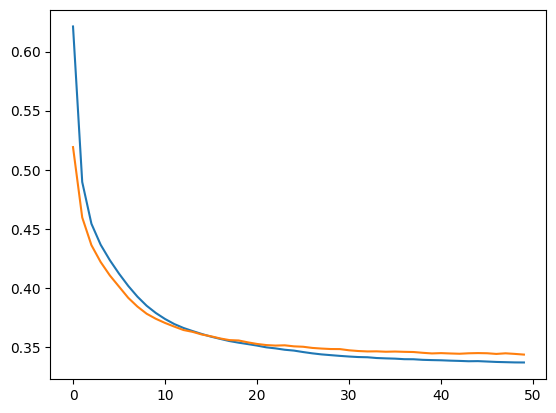

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


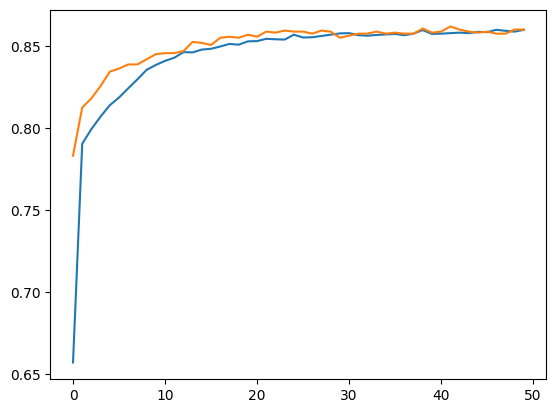

In [54]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])